In [1]:
%matplotlib inline
import os
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torchvision import utils
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

In [2]:
torch.cuda.is_available()

True

In [3]:
data = './data'
if not os.path.exists(data):
    os.mkdir(data)

In [4]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(1.0,))])

train_data = dset.MNIST(root=data, train=True, download=True, transform=transform)
test_data = dset.MNIST(root=data, train=False, download=True, transform=transform)

In [5]:
batch_size = 10

train_loader = torch.utils.data.DataLoader(
                    dataset=train_data,
                    batch_size=batch_size,
                    shuffle=True
                )

test_loader = torch.utils.data.DataLoader(
                    dataset=test_data,
                    batch_size=batch_size,
                    shuffle=True
                )
print ('Train Batches: {}'.format(len(train_loader)))
print ('Test Batches: {}'.format(len(test_loader)))

Train Batches: 6000
Test Batches: 1000


In [6]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 256)
        self.fc3 = nn.Linear(256, 10)
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [7]:
model = MLP()
model = model.cuda()

In [8]:
model

MLP(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

In [9]:
optimizer = optim.SGD(model.parameters(),lr=0.01, momentum=0.9)

In [10]:
criterion = nn.CrossEntropyLoss()

In [11]:
def train(model, train_loader, criterion, optimizer, num_epochs):
    for epoch in range(num_epochs):
        for idx, (X,y) in enumerate(train_loader):
            X,y = Variable(X.cuda()), Variable(y.cuda())
            
            optimizer.zero_grad()
            
            prediction = model(X)
            train_loss = criterion(prediction, y)
            train_loss.backward()
            optimizer.step()
        
        total_cnt = 0
        correct_cnt = 0
        for idx, (X,y) in enumerate(test_loader):
            X,y = Variable(X.cuda()), Variable(y.cuda())
            prediction = model(X)
            
            test_loss = criterion(prediction, y)
            _,y_pred = torch.max(prediction.data,1)
            
            total_cnt += X.data.size()[0]
            correct_cnt += (y_pred == y.data).sum()
            
            val_accuracy = 100 * correct_cnt / total_cnt
            
        print("Epoch: {}/{} Train Loss: {} Validation Loss: {} Validation Accuracy: {} ".format(epoch+1,num_epochs,train_loss,
                                                                                                test_loss, val_accuracy))

In [12]:
num_epochs = 5
train(model, train_loader, criterion, optimizer, num_epochs)

Epoch: 1/5 Train Loss: 0.013572740368545055 Validation Loss: 0.45042920112609863 Validation Accuracy: 93 
Epoch: 2/5 Train Loss: 0.14710859954357147 Validation Loss: 0.4660528600215912 Validation Accuracy: 95 
Epoch: 3/5 Train Loss: 0.004250478930771351 Validation Loss: 0.026357555761933327 Validation Accuracy: 96 
Epoch: 4/5 Train Loss: 0.011965751647949219 Validation Loss: 0.01811523362994194 Validation Accuracy: 97 
Epoch: 5/5 Train Loss: 0.008028221316635609 Validation Loss: 0.0019460677867755294 Validation Accuracy: 96 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Ground truth:      1     4     3     8     1     6     2     0     2     8


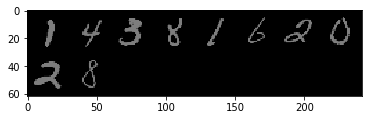

In [15]:
classes = ('0','1','2','3','4','5','6','7','8','9')

dataiter = iter(test_loader)
X,y = dataiter.next()
# outputs = model(Variable(X))
# print(outputs)
# print(classes)

img=utils.make_grid(X)
plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))
# print labels
print('Ground truth: ', ' '.join('%5s' % classes[y[j]] for j in range(batch_size)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[ -2.4153,   7.4875,  -0.5769,   0.9694,   0.1406,  -5.6353,
          -4.8079,   3.9468,   3.1853,  -1.6352],
        [ -7.9401,  -2.1801,  -2.9119, -10.8809,  24.9047,   2.6015,
          -1.3775,  -3.3306,  -2.5028,   3.7406],
        [ -7.1150,   0.8972,  -1.6344,  18.6065,  -3.5241,   5.2452,
         -13.8560,  -7.3989,   0.2844,   8.1313],
        [ -3.6060,   5.0593,  -5.9272,  -6.2265,   2.6875,   2.9697,
           3.1547,  -4.4932,  14.6294,  -7.2613],
        [ -4.7301,  13.4723,   1.1086,  -7.8123,   0.6219,   0.1544,
           1.0342,  -0.3463,   1.0999,  -4.0053],
        [  0.8047,  -1.9770,   1.9497,  -1.3558,   0.9231,   3.9797,
          12.5404,  -9.5973,  -0.1337,  -6.7806],
        [ -1.9046,  -2.7062,   5.6178,  -1.5060,   1.2059,   0.8908,
           3.8252,  -5.3306,   0.5705,  -0.2847],
        [ 20.6530,  -8.8335,   2.3124,  -8.8408,   4.5354,  -7.3023,
           5.3562,  -1.9239, -11.0383,   3.7907],
        [ -6.0812,   1.1464,  29.7792,   7.1301,

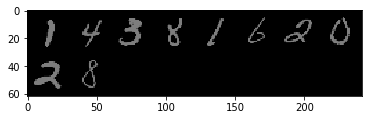

In [26]:
outputs = model(Variable(X.cuda()))
print(outputs)
print(classes)

# show normalized images
img=utils.make_grid(X)
plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))
# print labels
print('Ground truth: ', ' '.join('%5s' % classes[y[j]] for j in range(batch_size)))

_, predicted = torch.max(outputs.data, 1)

# print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
#                               for j in range(batch_size)))

In [25]:
predicted

tensor([[[ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0],
         ...,
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0]],

        [[ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0],
         ...,
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0]],

        [[ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0],
         ...,
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0]],

        ...,

        [[ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0],
         ...,
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0, 